In [78]:
# Implementación de los solvers iterativos Jacobi, Gauss-Seidel y SOR junto con el de CGM.
using LinearAlgebra 
using BenchmarkTools
using PyCall
using PyPlot

plt = pyimport("matplotlib.pyplot")

PyObject <module 'matplotlib.pyplot' from '/home/edwinheny/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [16]:
##
# Funciones para construir el sistema Ax = b. Se debe usar un número entero par
# mayor que cero.
# #

##
# Función que construye la matriz "A".
##
function matrizSistema( n )
    M = Tridiagonal(-1*ones(n-1), 3*ones(n), -1*ones(n-1))
    M = M + zeros(n,n)
    for i = 1:n
        if i != n/2 && i != n/2 + 1
            M[i,n+1-i] = 0.5
        end
    end
    return M
end

matrizSistema (generic function with 1 method)

In [17]:
##
# Función que construye el vector "b".
## 
function vectorSistema(n)
    b = zeros(n,1)
    b[1] = 2.5
    b[n] = 2.5
    for i = 2:n-1
        if i == n/2 || i == n/2+1
            b[i] = 1
        else
            b[i] = 1.5
        end
    end
    return b
end

vectorSistema (generic function with 1 method)

In [94]:
##
# Funciones que implementan los métodos de Jacobi,
# Gauss-Seidel, SOR y CGM.
##

##
# Implementación del método de Jacobi
##
function metodo_jacobi(D, L, U, x0, iterMax, tol)
    # Norma
    normres_jacobi = []
    x = x0

    for j = 1:iterMax
        x = inv(D)*(b-(L+U)*x)
        normres_jacobi = [normres_jacobi; norm(b-A*x, Inf)]
        if normres_jacobi[end] <= tol
            println("Jacobi => Iteración máxima: ", j)
            break
        end
    end

    return x, normres_jacobi

end

metodo_jacobi (generic function with 1 method)

In [95]:
###
# Implementación del método de Gauss-Seidel
##
function metodo_gs(D, L, U, x0, iterMax, tol)
    # Norma
    normres_gs = []
    x = x0

    for j = 1:iterMax
        x = inv(D+L)*(b-U*x)
        normres_gs = [normres_gs; norm(b-A*x, Inf)]
        if normres_gs[end] <= tol
            println("GS     => Iteración máxima: ", j)
            break
        end
    end

    return x, normres_gs

end

metodo_gs (generic function with 1 method)

In [96]:
##
# Implementación del método de SOR
##
function metodo_sor(D, L, U, x0, w, iterMax, tol)
    # Norma
    normres_sor = []
    x = x0

    for j = 1:iterMax
        x = inv(w*L + D)*((1-w)D*x- w*U*x) + w*inv(D + w*L)*b
        normres_sor = [normres_sor; norm(b-A*x, Inf)]
        if normres_sor[end] <= tol
            println("SOR    => Iteración máxima: ", j)
            break
        end
    end

    return x, normres_sor

end

metodo_sor (generic function with 1 method)

In [97]:
##
# Implementación del método de CGM
##

function metodo_cgm(A, b, x0, tol)
    x = x0
    r = b - A*x
    d = r
    normres_cgm = []
    for k = 1:length(b)
        rTr = dot(r,r)
        normres_cgm = [normres_cgm; norm(r, Inf)]
        if normres_cgm[end] <= tol
            println("CGM    => Iteración máxima: ", k)
            break
        end
        alpha = rTr/dot(d,A*d)
        x = x + alpha*d
        r = r - alpha*A*d
        betha = dot(r,r)/rTr
        d = r + betha*d
    end
    return x, normres_cgm
end

metodo_cgm (generic function with 1 method)

In [100]:
##
# Experimento Numérico
##

#Aquí se cambia el tamaño para obtener la matriz A y el vector b.
# Solo ingresar números enteros positivos pares.
A = matrizSistema( 100 )
b = vectorSistema( 100 )
iterMax = 10000000
tol = 1e-8
w = 1.13

# Descomposición A = D + L + U
D =  Diagonal(A)
L = tril(A,-1)
U = triu(A,1)

# Vector inicial x0
x0 = zeros(size(b));

In [99]:
##
# En este apartado se muestra el numéro de la iteración donde alcanza convergencia
# cada uno de los métodos y además arroja el error, el residuo más pequeño obtenido.
# xJ: solución aproximada Jacobi
# xGS: solución aproximada Gaus-Seidel
# xSOR: solución aproximada SOR
# xCGM: solución aproximada CGM
# normres_nombre-método: vector con los residuos obtenidos.

xJ, normres_jacobi = metodo_jacobi( D, L, U, x0, iterMax, tol)
println("El error es: ", minimum(normres_jacobi))

xG, normres_gs = metodo_gs( D, L, U, x0, iterMax, tol )
println("El error es: ", minimum(normres_gs))

xS, normres_sor = metodo_sor( D, L, U, x0, w, iterMax, tol)
println("El error es: ", minimum(normres_sor))

xC, normres_cgm = metodo_cgm( A, b, x0, tol )
println("El error es: ", minimum(normres_cgm))

Jacobi => Iteración máxima: 77
El error es: 8.563995068655572e-9
GS     => Iteración máxima: 49
El error es: 8.853862309976535e-9
SOR    => Iteración máxima: 38
El error es: 8.303469911652428e-9
CGM    => Iteración máxima: 19
El error es: 8.201596050609967e-9


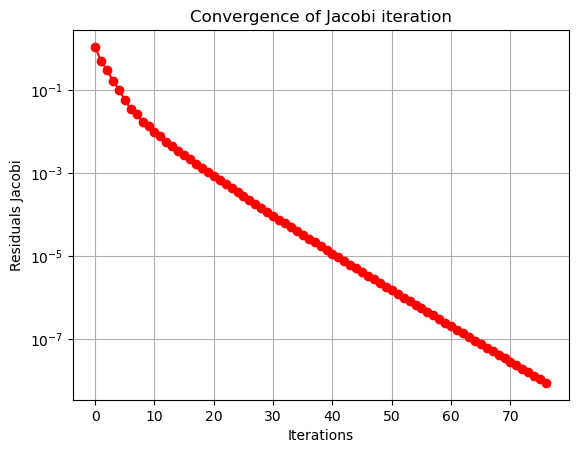

PyObject Text(0.5, 1.0, 'Convergence of Jacobi iteration')

In [92]:
##
# En este apartado se realizan las gráficas de los residuos vs las iteraciones.
##

plt.plot(normres_jacobi, color="red", "o-")
plt.grid(linestyle="-")
plt.xlabel("Iterations")
plt.ylabel("Residuals Jacobi")
plt.yscale("log")
plt.title("Convergence of Jacobi iteration")

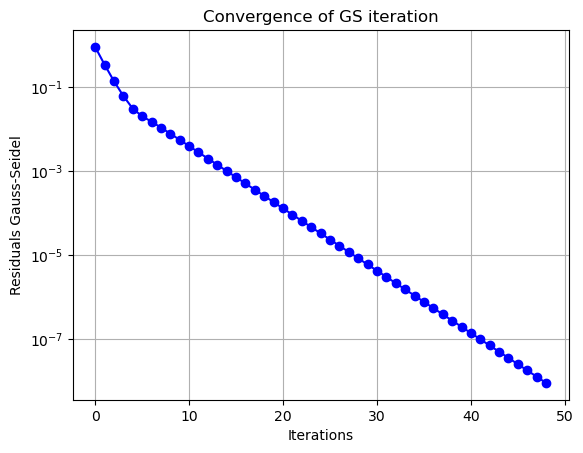

PyObject Text(0.5, 1.0, 'Convergence of GS iteration')

In [44]:
plt.plot(normres_gs, color="blue", "o-")
plt.grid(linestyle="-")
plt.xlabel("Iterations")
plt.ylabel("Residuals Gauss-Seidel")
plt.yscale("log")
plt.title("Convergence of GS iteration")

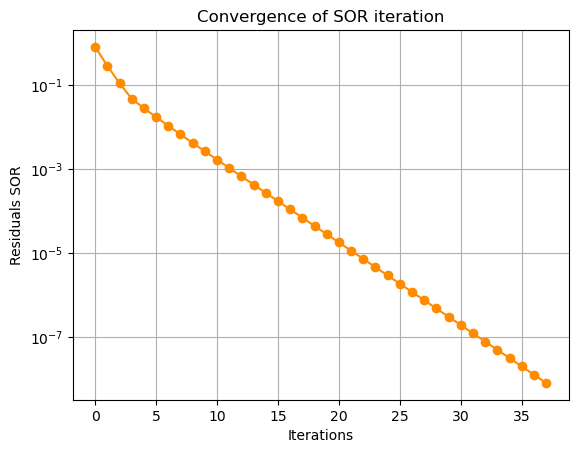

PyObject Text(0.5, 1.0, 'Convergence of SOR iteration')

In [45]:
plt.plot(normres_sor, color="darkorange", "o-")
plt.grid(linestyle="-")
plt.xlabel("Iterations")
plt.ylabel("Residuals SOR")
plt.yscale("log")
plt.title("Convergence of SOR iteration")

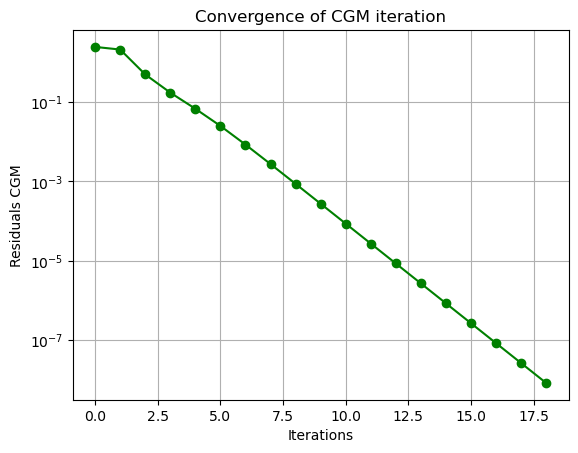

PyObject Text(0.5, 1.0, 'Convergence of CGM iteration')

In [46]:
plt.plot(normres_cgm, color="green", "o-")
plt.grid(linestyle="-")
plt.xlabel("Iterations")
plt.ylabel("Residuals CGM")
plt.yscale("log")
plt.title("Convergence of CGM iteration")

En este apartado se quita el código donde se imprime la iteración donde alcanzan la convergencia los métodos iterativos, para realizar el análisis de rendimiento.

In [88]:
##
# Funciones que implementan los métodos de Jacobi,
# Gauss-Seidel, SOR y CGM.
##

##
# Implementación del método de Jacobi
##
function metodo_jacobi(D, L, U, x0, iterMax, tol)
    # Norma
    normres_jacobi = []
    x = x0

    for j = 1:iterMax
        x = inv(D)*(b-(L+U)*x)
        normres_jacobi = [normres_jacobi; norm(b-A*x, Inf)]
        if normres_jacobi[end] <= tol
            break
        end
    end

    return x, normres_jacobi

end

metodo_jacobi (generic function with 1 method)

In [89]:
###
# Implementación del método de Gauss-Seidel
##
function metodo_gs(D, L, U, x0, iterMax, tol)
    # Norma
    normres_gs = []
    x = x0

    for j = 1:iterMax
        x = inv(D+L)*(b-U*x)
        normres_gs = [normres_gs; norm(b-A*x, Inf)]
        if normres_gs[end] <= tol
            break
        end
    end

    return x, normres_gs

end

metodo_gs (generic function with 1 method)

In [90]:
##
# Implementación del método de SOR
##
function metodo_sor(D, L, U, x0, w, iterMax, tol)
    # Norma
    normres_sor = []
    x = x0

    for j = 1:iterMax
        x = inv(w*L + D)*((1-w)D*x- w*U*x) + w*inv(D + w*L)*b
        normres_sor = [normres_sor; norm(b-A*x, Inf)]
        if normres_sor[end] <= tol
            break
        end
    end

    return x, normres_sor

end

metodo_sor (generic function with 1 method)

In [91]:
##
# Implementación del método de CGM
##

function metodo_cgm(A, b, x0, tol)
    x = x0
    r = b - A*x
    d = r
    normres_cgm = []
    for k = 1:length(b)
        rTr = dot(r,r)
        normres_cgm = [normres_cgm; norm(r, Inf)]
        if normres_cgm[end] <= tol
            break
        end
        alpha = rTr/dot(d,A*d)
        x = x + alpha*d
        r = r - alpha*A*d
        betha = dot(r,r)/rTr
        d = r + betha*d
    end
    return x, normres_cgm
end

metodo_cgm (generic function with 1 method)

In [74]:
BenchmarkTools.DEFAULT_PARAMETERS.samples = 100
bJ = @benchmark metodo_jacobi( D, L, U, x0, iterMax, tol)

BenchmarkTools.Trial: 100 samples with 1 evaluation.
 Range (min … max):  1.488 ms …   5.654 ms  ┊ GC (min … max): 0.00% …  0.00%
 Time  (median):     1.639 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.977 ms ± 749.332 μs  ┊ GC (mean ± σ):  7.78% ± 13.51%

  ▅█▅▃▂▁▂                                                      
  ███████▇▅▅▅▅▁▁▁▁▁▁▇▇▇▇▅▅▁▇▅▁▁▅▁▁▅▁▅▁▁▁▁▁▁▁▁▁▁▅▅▁▁▁▁▁▁▁▁▁▁▁▅ ▅
  1.49 ms      Histogram: log(frequency) by time      4.92 ms <

 Memory estimate: 6.31 MiB, allocs estimate: 1003.

In [75]:
bGS = @benchmark metodo_gs( D, L, U, x0, iterMax, tol)

BenchmarkTools.Trial: 100 samples with 1 evaluation.
 Range (min … max):  4.841 ms … 94.359 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     7.420 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   9.644 ms ± 10.077 ms  ┊ GC (mean ± σ):  2.92% ± 6.19%

  ▅█   ▄                                                      
  ██▇▇▇█▄▄▃▇▆▄▁▃▁▄▄▁▃▃▃▁▁▁▁▁▃▁▁▁▃▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▁▁▃ ▃
  4.84 ms        Histogram: frequency by time        37.6 ms <

 Memory estimate: 7.70 MiB, allocs estimate: 639.

In [76]:
bSOR = @benchmark metodo_sor( D, L, U, x0, w, iterMax, tol)

BenchmarkTools.Trial: 100 samples with 1 evaluation.
 Range (min … max):   7.658 ms … 213.518 ms  ┊ GC (min … max): 0.00% … 0.94%
 Time  (median):     12.547 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   19.731 ms ±  27.057 ms  ┊ GC (mean ± σ):  4.26% ± 7.55%

  █▆▁                                                           
  ████▆▄▅▃▄▁▃▁▃▃▃▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▁▁▁▁▁▁▁▃ ▃
  7.66 ms         Histogram: frequency by time          147 ms <

 Memory estimate: 17.71 MiB, allocs estimate: 1066.

In [77]:
bCGM = @benchmark metodo_cgm( A, b, x0, tol )

BenchmarkTools.Trial: 100 samples with 1 evaluation.
 Range (min … max):  221.200 μs …   2.742 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     237.650 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   473.181 μs ± 542.912 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █                                                              
  █▇▁▁▁▁▄▄▄▁▁▁▁▆▆▄▁▄▆▁▁▁▄▁▁▄▇▄▁▁▁▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▁▁▁▄▁▁▁▄ ▄
  221 μs        Histogram: log(frequency) by time       2.69 ms <

 Memory estimate: 115.12 KiB, allocs estimate: 187.